# Introduction

Predicting customer churn is essential for sustainable revenue growth. It’s usually much more expensive to acquire new customers than to retain existing ones. Plus, when customers stick around longer, they tend to spend more, which increases their lifetime value. This also gives companies the chance to gather valuable data that can be used for targeted marketing and cross-selling, ultimately maximizing revenue.

In this notebook, we’ll:

1. **Explore the Customer Dataset**: We’ll dive deep to uncover behavioral patterns and trends associated with churn.
2. **Build a Predictive Model**: This model will help us identify at-risk customers, enabling the company to take proactive, targeted actions to improve customer retention, reduce churn, and support long-term growth.

## Outline

This project is broken down into 5 steps:

1. Import Dependencies
2. Load and Prepare the Data
3. Exploratory Data Analysis (EDA)
4. Preparing Pre-Processing Pipeline
5. Build and Evaluate the Model

## Data Description

| Column Name | Description |
|----|----|
| **CustomerID** | Unique customer ID |
| **Churn** | Churn Flag |
| **Tenure** | Tenure of customer in organization  |
| **PreferredLoginDevice** | Preferred login device of customer |
| **CityTier** | City tier |
| **WarehouseToHome**| Distance in between warehouse to home of customer |
| **PreferredPaymentMode** | Preferred payment method of customer |
| **Gender** | Gender of customer |
| **HourSpendOnApp** | Number of hours spend on mobile application or website |
| **NumberOfDeviceRegistered** | Total number of deceives is registered on particular customer |
| **PreferedOrderCat** | Preferred order category of customer in last month |
| **SatisfactionScore** | Satisfactory score of customer on service |
| **MaritalStatus** | Marital status of customer |
| **NumberOfAddress** | Total number of added added on particular customer |
| **Complain** | Any complaint has been raised in last month |
| **OrderAmountHikeFromlastYear** | Percentage increases in order from last year |
| **CouponUsed** | Total number of coupon has been used in last month |
| **OrderCount** | Total number of orders has been places in last month |
| **DaySinceLastOrder** | Day Since last order by customer |
| **CashbackAmount** | Average cashback in last month |

As shown from the records above dataset includes a range of features from customer demographics to their purchasing behaviors. Key attributes include:

- Customer Demographics: Gender, City Tier, Marital Status.
- Shopping Preferences: Preferred Login Device, Preferred Payment Mode, Preferred Order Categories.
- Engagement Metrics: Hours Spent on App, Number of Devices Registered, Satisfaction Score.
- Transactional Behavior: Order Amount Hike from Last Year, Number of Addresses, Frequency of Coupon Usage

# Step 1: Import Dependencies

In [29]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import set_config
set_config(display = "diagram")

# Step 2: Load and Prepare the Data

In [30]:
df = pd.read_excel("./E Commerce Dataset.xlsx", sheet_name = "E Comm")

In [31]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [32]:
df.shape

(5630, 20)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [34]:
df.duplicated().any()

False

Since there are no duplicates, we can drop the CustomerID column, as it won't necessarily play a role in our analysis.

In [35]:
df = df.drop('CustomerID', axis = 1)

In [36]:
df.nunique()

Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64

## Handling Missing Values

In [37]:
Missing_count = df.isnull().sum()
Missing_percent = df.isnull().sum()*100/df.shape[0]

pd.DataFrame({
    'Missing Count': Missing_count,
    'Missing Percentage': Missing_percent
})

,Missing Count,Missing Percentage
Churn,0,0.000000
Tenure,264,4.689165
PreferredLoginDevice,0,0.000000
CityTier,0,0.000000
WarehouseToHome,251,4.458259
PreferredPaymentMode,0,0.000000
Gender,0,0.000000
HourSpendOnApp,255,4.529307
NumberOfDeviceRegistered,0,0.000000
PreferedOrderCat,0,0.000000


All missing values are less than 6% and occur in the numerical columns. We can use mean imputation with SimpleImputer to fill in these missing values.

## Replacing duplicate values

In [38]:
object_col = df.select_dtypes(include = "O").columns.tolist()

for n in object_col:
    print(f'{n}: {df[n].unique().tolist()}')

PreferredLoginDevice: ['Mobile Phone', 'Phone', 'Computer']
PreferredPaymentMode: ['Debit Card', 'UPI', 'CC', 'Cash on Delivery', 'E wallet', 'COD', 'Credit Card']
Gender: ['Female', 'Male']
PreferedOrderCat: ['Laptop & Accessory', 'Mobile', 'Mobile Phone', 'Others', 'Fashion', 'Grocery']
MaritalStatus: ['Single', 'Divorced', 'Married']



- In the column PreferredLoginDevice, 'Mobile Phone' and 'Phone' are the same.
- In the column PreferredPaymentMode, 'CC' and 'Credit Card' are the same, as well as 'COD' and 'Cash on Delivery.'
- In the column PreferredOrderCat, 'Mobile' and 'Mobile Phone' are the same.

In [39]:
df['PreferredLoginDevice']= df['PreferredLoginDevice'].replace('Mobile Phone', 'Phone')

df['PreferedOrderCat'] = df['PreferedOrderCat'].replace(['Mobile Phone', 'Mobile'],'Phone') 

df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace(['CC', 'COD'], ['Credit Card', 'Cash on Delivery'])

#After replacing:

object_col = df.select_dtypes(include = "O").columns.tolist()

for n in object_col:
    print(f'{n}: {df[n].unique().tolist()}')

PreferredLoginDevice: ['Phone', 'Computer']
PreferredPaymentMode: ['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet']
Gender: ['Female', 'Male']
PreferedOrderCat: ['Laptop & Accessory', 'Phone', 'Others', 'Fashion', 'Grocery']
MaritalStatus: ['Single', 'Divorced', 'Married']


## Genereal Stats for Object and Interger Type Columns

In [40]:
# Statistics for all object-type columns in the DataFrame. 

df.select_dtypes(include = "O").describe().T

,count,unique,top,freq
PreferredLoginDevice,5630,2,Phone,3996
PreferredPaymentMode,5630,5,Debit Card,2314
Gender,5630,2,Male,3384
PreferedOrderCat,5630,5,Phone,2080
MaritalStatus,5630,3,Married,2986


In [41]:
# Statistics for all integer-type columns in the DataFrame. 

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00
OrderAmountHikeFromlastYear,5365.0,15.707922,3.675485,11.0,13.00,15.00,18.0000,26.00


# Step 3: Exploratory Data Analysis (EDA)

## Separating Categorial and Numeric Features

In [42]:
categorical_columns = ['Churn','PreferredLoginDevice','CityTier','PreferredPaymentMode','Gender',
                       'PreferedOrderCat','SatisfactionScore','MaritalStatus','Complain',]

numerical_columns = df.drop(categorical_columns, axis=1).columns.tolist()

## Understanding the distribution of Features

In [43]:
# Breakdown of Categorical Columns

for n in categorical_columns:
    print(df[n].value_counts())
    print('--------------------------------')

Churn
0    4682
1     948
Name: count, dtype: int64
--------------------------------
PreferredLoginDevice
Phone       3996
Computer    1634
Name: count, dtype: int64
--------------------------------
CityTier
1    3666
3    1722
2     242
Name: count, dtype: int64
--------------------------------
PreferredPaymentMode
Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: count, dtype: int64
--------------------------------
Gender
Male      3384
Female    2246
Name: count, dtype: int64
--------------------------------
PreferedOrderCat
Phone                 2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: count, dtype: int64
--------------------------------
SatisfactionScore
3    1698
1    1164
5    1108
4    1074
2     586
Name: count, dtype: int64
--------------------------------
MaritalStatus
Married     2986
Single      1796
Divorced     848

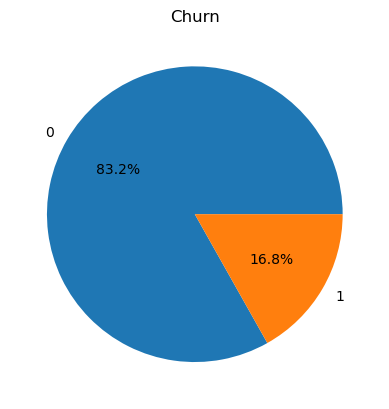

In [44]:
pie = df["Churn"].value_counts()
plt.pie(pie, labels = pie.index, autopct='%1.1f%%')
plt.title("Churn")
plt.show()

Our dataset is clearly imbalanced, with only 16.8% of customers having churned. For our model, correctly predicting these potential churners (true positives) is critical, as it enables proactive actions to retain customers. While we also want to avoid misclassifying loyal customers as churners (false positives), the cost of mistakenly contacting a satisfied customer is generally lower than the loss of a churned customer who might have stayed with proper intervention.

Therefore, rather than emphasizing overall accuracy, our focus will be on metrics like Precision, Recall, and F1-score, which better capture the importance of identifying churners accurately.

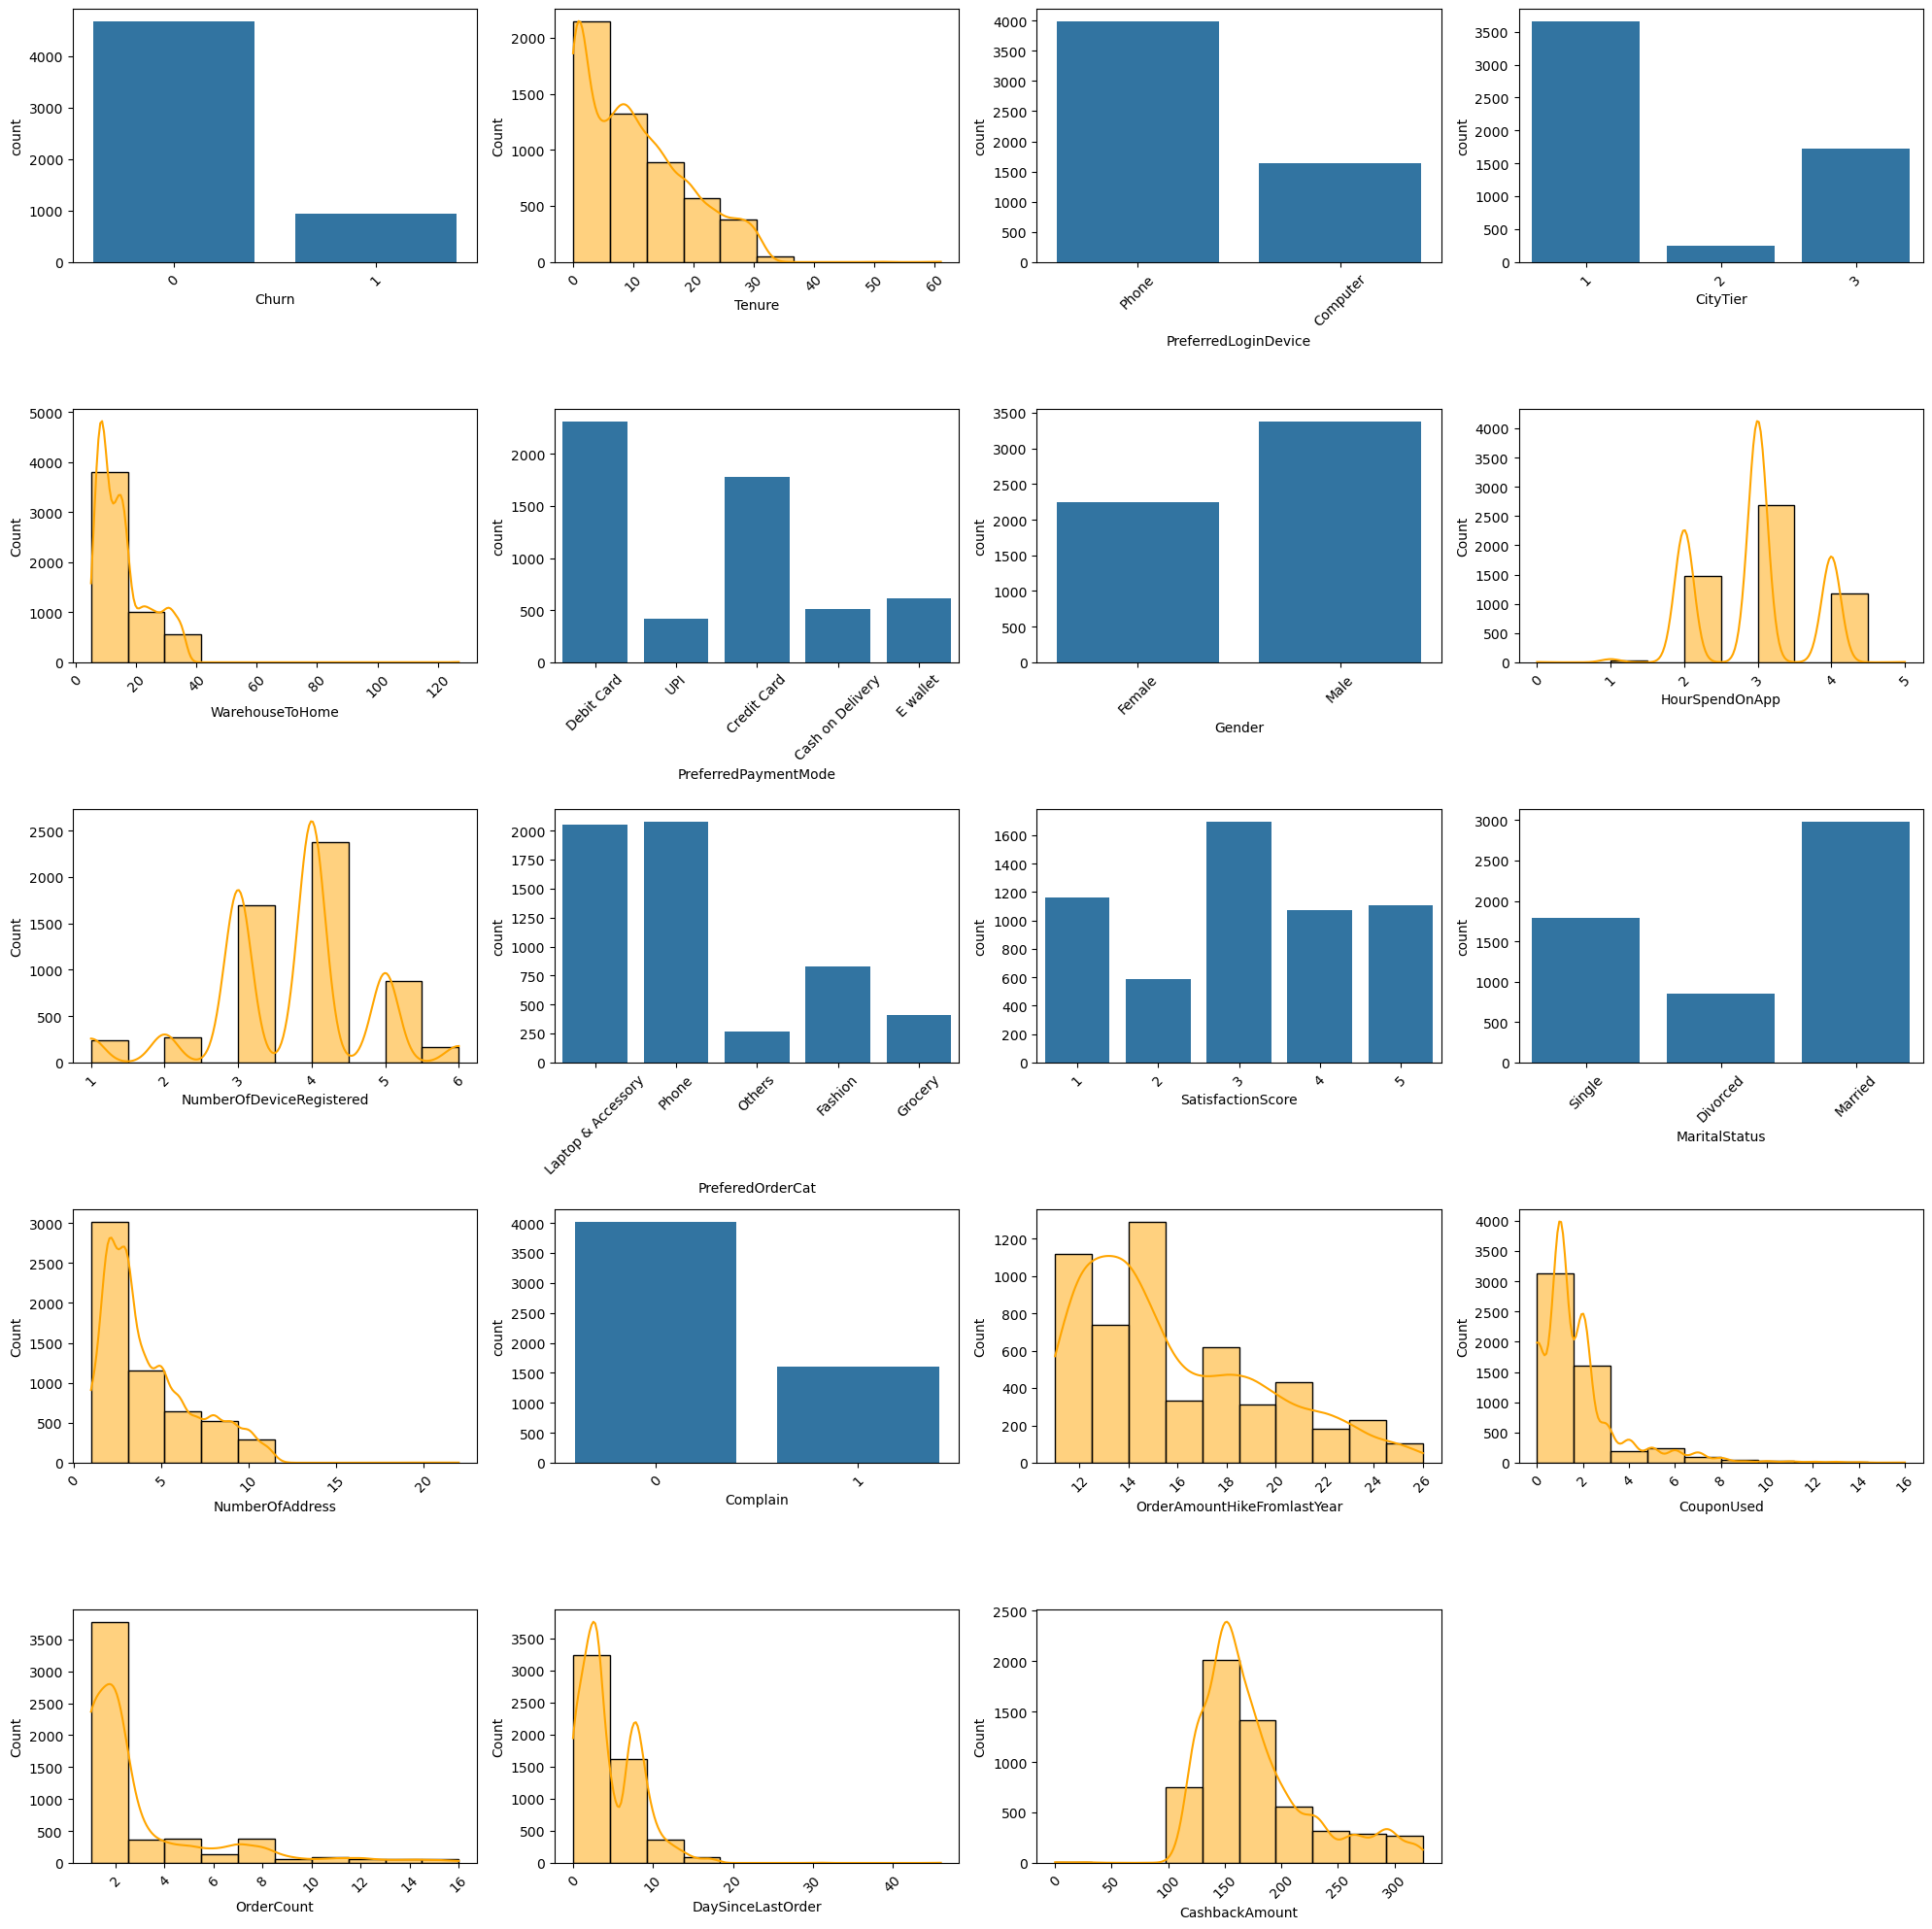

In [45]:
plt.figure(figsize=(20, 20))

for i, n in enumerate(df.columns.tolist()):
    ax = plt.subplot(5, 4, i+1)
    
    if n in numerical_columns:
        sns.histplot(data=df, x=n, bins=10, ax=ax, kde=True, color = 'orange')
        plt.xticks(rotation=45)
    else:
        sns.countplot(data=df, x=n, ax=ax)
        plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Analyzing the Relationship between Churn and Categorical Features

In [46]:
for n in categorical_columns:
    if n != 'Churn':
        grouped_data = df.groupby([n, 'Churn']).size().unstack(fill_value=0)
        grouped_data['Total Count'] = (grouped_data[0] + grouped_data[1]) 
        grouped_data['Churn Rate (%)'] = (grouped_data[1] / (grouped_data[0] + grouped_data[1])) * 100
        print(grouped_data)
        print("-------------------------------------------------------------")
        print("")

Churn                    0    1  Total Count  Churn Rate (%)
PreferredLoginDevice                                        
Computer              1310  324         1634       19.828641
Phone                 3372  624         3996       15.615616
-------------------------------------------------------------

Churn        0    1  Total Count  Churn Rate (%)
CityTier                                        
1         3134  532         3666       14.511729
2          194   48          242       19.834711
3         1354  368         1722       21.370499
-------------------------------------------------------------

Churn                    0    1  Total Count  Churn Rate (%)
PreferredPaymentMode                                        
Cash on Delivery       386  128          514       24.902724
Credit Card           1522  252         1774       14.205186
Debit Card            1958  356         2314       15.384615
E wallet               474  140          614       22.801303
UPI                

In [47]:
df[categorical_columns].select_dtypes(exclude="O").groupby("Churn").mean()

,CityTier,SatisfactionScore,Complain
Churn,,,
0,1.619821,3.001282,0.234088
1,1.827004,3.390295,0.535865


### Key Insights on Categorical Features

- **PreferredLoginDevice**: Computer devices exhibit a slightly higher churn rate (19.8%) compared to mobile devices (15.5%). Enhancing website user experience may help reduce this disparity.
- **CityTier**: Churn rates appear to be directly proportional to City Tier, indicating that customers in lower tiers are more likely to churn.
- **PreferredPaymentMode**: Customers using Cash on Delivery show the highest churn rate at 24.90%, followed by E-wallet users at 22.80% and UPI users at 17.39%.
- **Gender**: Retention rates are nearly identical for male (17%) and female (15.5%) customers.
- **PreferedOrderCat**: Among order categories, phones have significantly higher churn rate at 27%, followed by fashion at approximately 15%. Other categories report churn rates of less than 10%.
- **SatisfactionScore**: Surprisingly, the average satisfaction score is higher for customers who churned(3.4/5) compared to those who remained (3/5). This indicates that factors beyond satisfaction may influence the decision to churn, or that satisfaction scores might not properly reflect the overall customer experience.
- **MaritalStatus**: Single individuals are more likely to churn than their married counterparts.
- **Complain**: As expected,  customers who have lodged complaints show a higher churn rate (31%) compared to those who haven’t (10.9%), highlighting the importance of addressing customer issues to boost retention.
  

## Analyzing the Relationship between Churn and Numeric Features

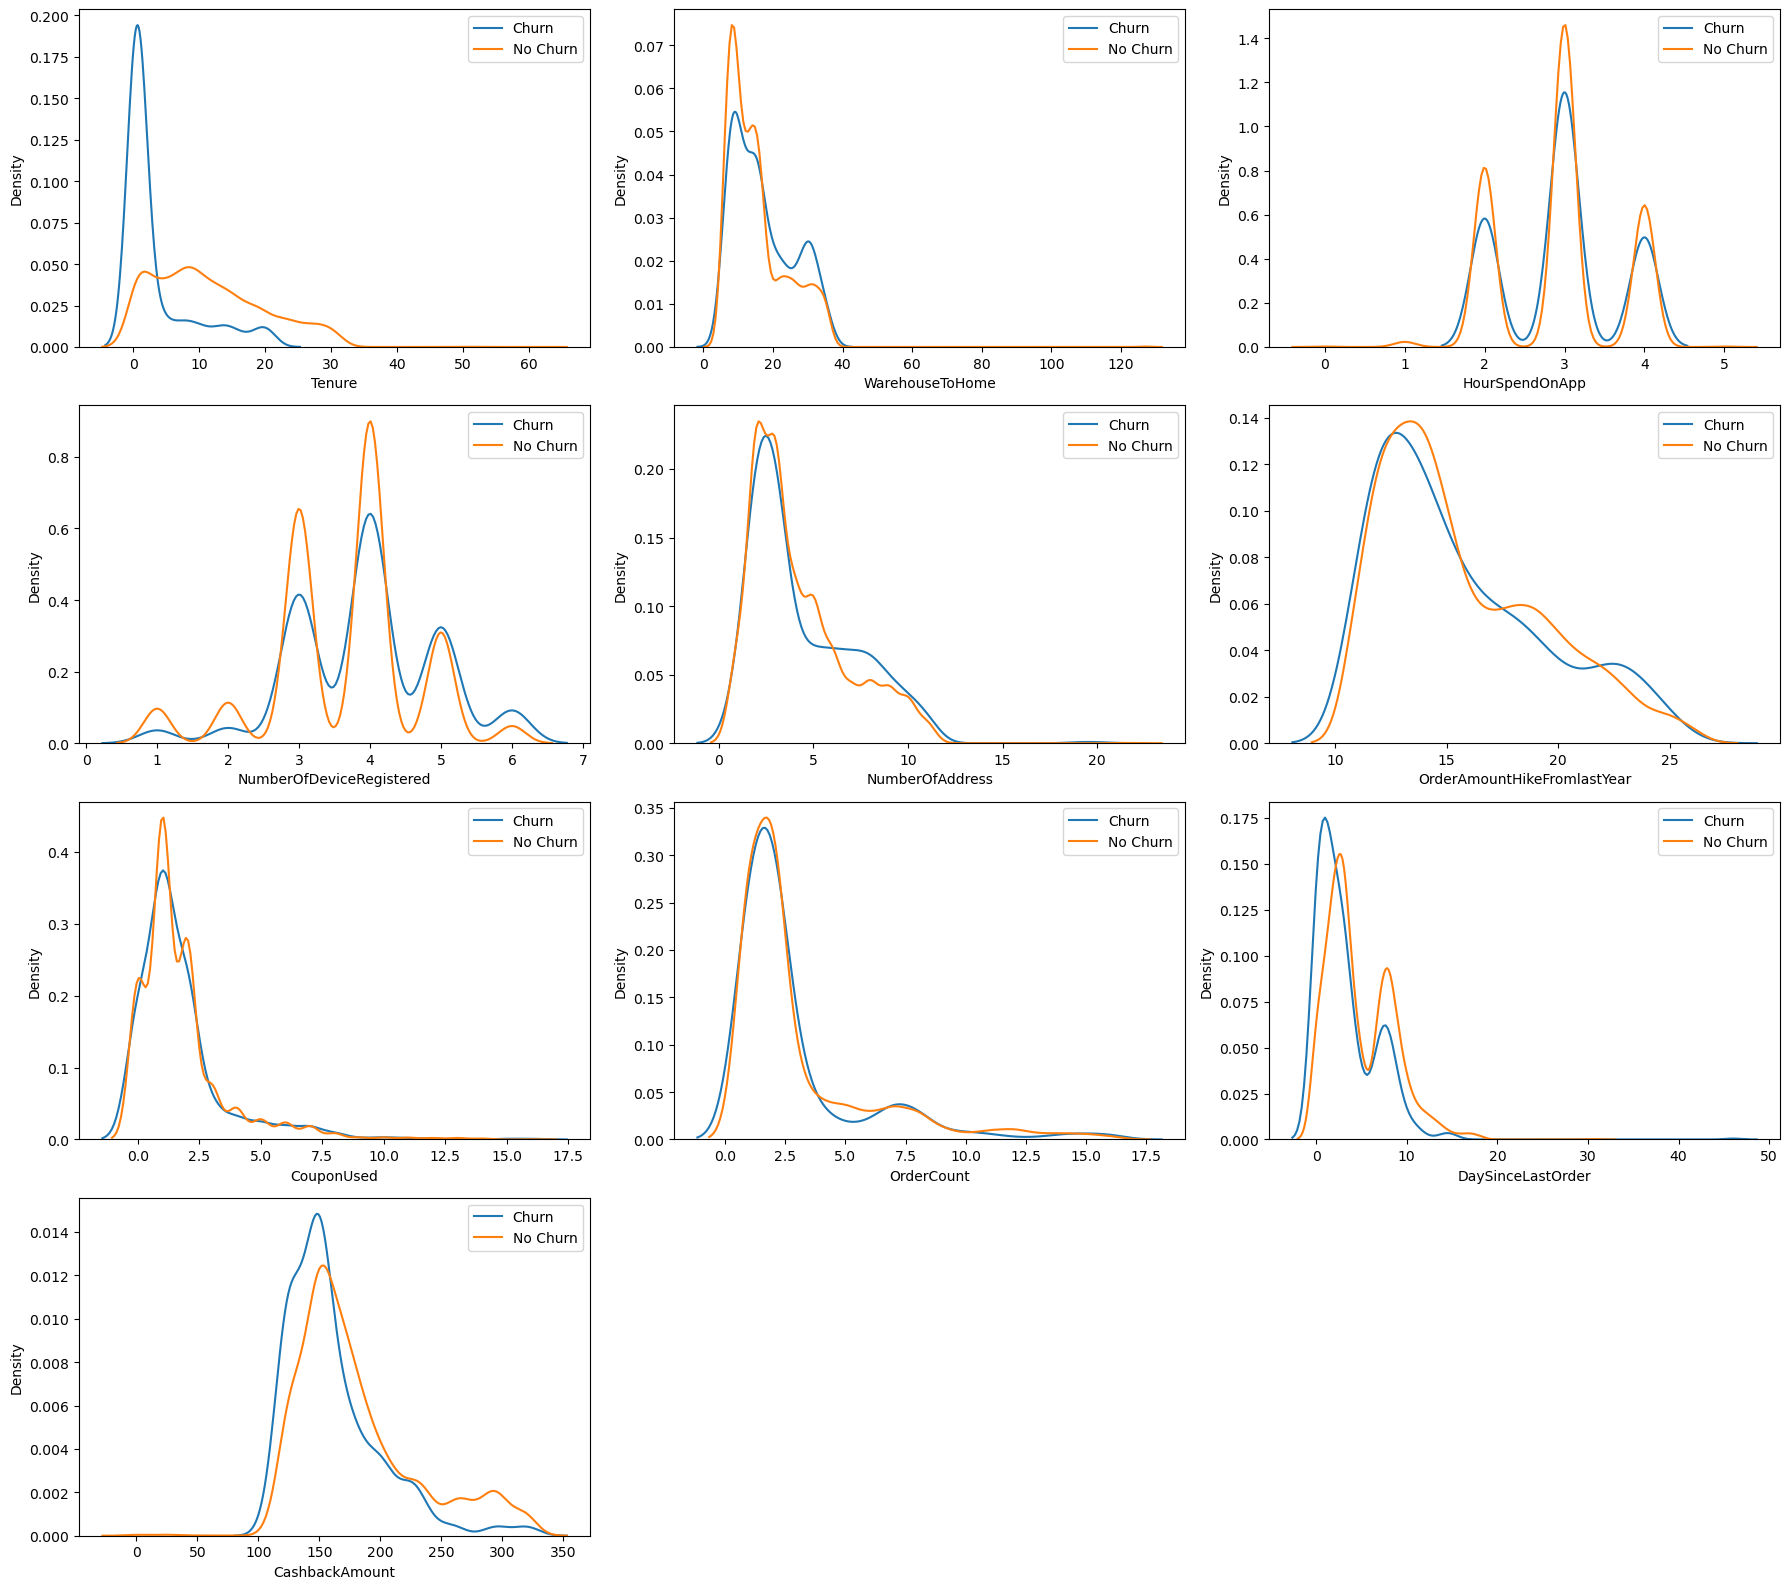

In [48]:
plt.figure(figsize=(18, 16))

for i, n in enumerate(numerical_columns):
    plt.subplot(4, 3, i+1)
    sns.kdeplot(df[df['Churn'] == 1][n], label = 'Churn')
    sns.kdeplot(df[df['Churn'] == 0][n], label = 'No Churn')
    plt.tight_layout()
    plt.legend(loc='upper right')

plt.show()

In [49]:
for n in numerical_columns:
    print(n + ":")
    print("")
    print(df.groupby('Churn').describe()[n])
    print("---------------------------------------------------------------------")
    print("")

Tenure:

        count       mean       std  min  25%   50%   75%   max
Churn                                                         
0      4499.0  11.502334  8.419217  0.0  5.0  10.0  17.0  61.0
1       867.0   3.379469  5.486089  0.0  0.0   1.0   3.0  21.0
---------------------------------------------------------------------

WarehouseToHome:

        count       mean       std  min  25%   50%   75%    max
Churn                                                          
0      4515.0  15.353931  8.483276  5.0  9.0  13.0  19.0  127.0
1       864.0  17.134259  8.631132  5.0  9.0  15.0  24.0   36.0
---------------------------------------------------------------------

HourSpendOnApp:

        count      mean       std  min  25%  50%  75%  max
Churn                                                     
0      4485.0  2.925530  0.727184  0.0  2.0  3.0  3.0  5.0
1       890.0  2.961798  0.694427  2.0  2.0  3.0  3.0  4.0
---------------------------------------------------------------------


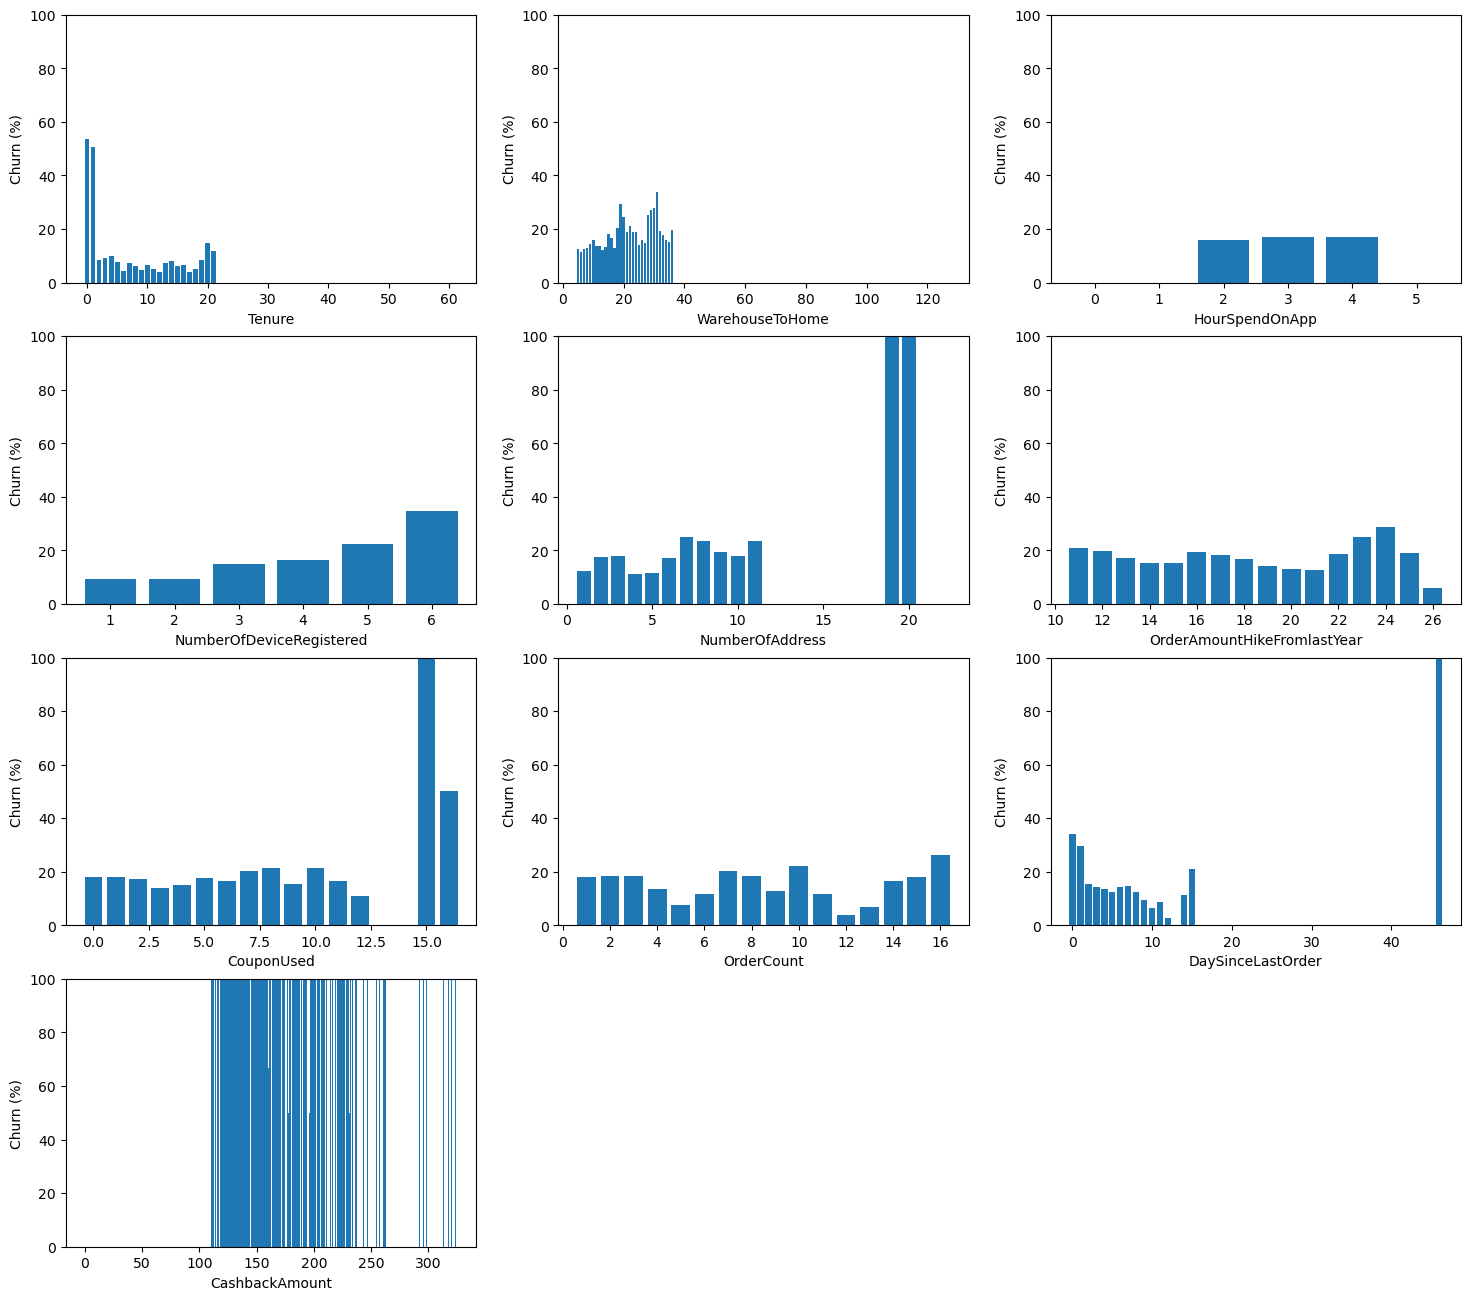

In [58]:
plt.figure(figsize=(18, 16))

for i, n in enumerate(numerical_columns):
    mean = df.groupby(n)['Churn'].mean() * 100
    plt.subplot(4, 3, i+1)
    plt.bar(mean.index, mean.values)
    plt.xlabel(n)
    plt.ylabel('Churn (%)')
    plt.ylim(0, 100)

plt.show()

### Key Insights on Numeric Features

- **Tenure**: There is a strong relationship between tenure and churn. Customers who engage with the service longer are less likely to churn, with an average tenure of 11.5 for retained customers compared to 3.3 for those who churn.
- **WarehouseToHome**: Customers with shorter warehouse-to-home distances show lower churn rates, suggesting that faster deliveries may contribute to higher satisfaction and retention.
- **HourSpendOnApp**: Both churned and retained customers spend a similar amount of time on the app, averaging around 2.9 hours. This suggests that time spent on the app may not be a strong differentiator for churn.
- **NumberOfDeviceRegistered**: Churn rates increase as the number of registered devices rises. Customers with five and six devices registered have churn rates of 22.47% and 34.57%, respectively. While multiple device compatibility may enhance convenience, the higher churn rate could indicate compatibility issues with certain systems.
- **DaySinceLastOrder**: Customers who recently placed an order (within 0 to 1 day) have notably high churn rates of 34% and 30%, respectively. Churn rates generally decline as the time since the last order increases, reaching lower rates between 4 and 10 days. However, churn rates rise again after 10 days, which could be attributed to a smaller sample size.
- **CashbackAmount**: High churn rates are observed for cashback amounts between 100 and 150. Churn decreases as cashback amounts increase, indicating that more generous cashback offers might enhance customer retention. 
- **NumberOfAddress, OrderAmountHikeFromlastYear, CouponUsed, OrderCount**: These features do not show significant differences between customers who churn and those who stay, suggesting limited impact on churn.
  


# Step 4: Prepare Pre-Processing Pipeline

The code builds two separate pipelines to preprocess categorical and numerical data. 
- pip1: Transforms categorical columns into nominal data using OneHotEncoder.
- pip2: Preprocesses numerical columns by filling in missing values with the mean and then standardizing the data.
- Both pipelines are then combined using ColumnTransformer to create a single preprocessing pipeline.

In [51]:
# Identifying object and interger columns

object_columns = df.select_dtypes("O").columns.tolist()
integer_columns = df.select_dtypes(['int64', 'float64']).drop('Churn', axis = 1).columns.tolist()

In [52]:
# Creating pipeline1 to transform object columns

pip1 = Pipeline(steps = [
    ("OneHotEncoder", OneHotEncoder())
])

# Creating ipeline2 to transform interger columns
pip2 = Pipeline(steps = [
    ("SimpleImputer", SimpleImputer(strategy="mean")),
    (("StandardScaler", StandardScaler()))
])

# Combining both pipelines using ColumnTransformer

preprocessor = ColumnTransformer([
    ("Categorical", pip1, object_columns),
    ("Numercial", pip2, integer_columns)
])

preprocessor

ColumnTransformer(transformers=[('Categorical',
                                 Pipeline(steps=[('OneHotEncoder',
                                                  OneHotEncoder())]),
                                 ['PreferredLoginDevice',
                                  'PreferredPaymentMode', 'Gender',
                                  'PreferedOrderCat', 'MaritalStatus']),
                                ('Numercial',
                                 Pipeline(steps=[('SimpleImputer',
                                                  SimpleImputer()),
                                                 ('StandardScaler',
                                                  StandardScaler())]),
                                 ['Tenure', 'CityTier', 'WarehouseToHome',
                                  'HourSpendOnApp', 'NumberOfDeviceRegistered',
                                  'SatisfactionScore', 'NumberOfAddress',
                                  'Complain', 'OrderAmountHikeFromlastYear',
                                  'CouponUsed', 'OrderCount',
                                  'DaySinceLastOrder', 'CashbackAmount'])])

# Step 5: Build and Evaluate the Model

## Split Train and Test

In [53]:
X = df.drop("Churn", axis =1 )
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Modelling

In [54]:
methods = {
    'Logistic Regression': LogisticRegression(),
    'Desicion Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machines': SVC(),
    'Xgboost': XGBClassifier()
}

In [55]:
for n in methods:
    print(f'{n}:')
    print()

    pipeline = make_pipeline(preprocessor, methods[n])
    pipeline.fit(X_train,y_train)

    prediction = pipeline.predict(X_test)

    print('Classification Report')
    print(classification_report(y_test, prediction))
    print()
    
    print('Confusion Matrix')
    print(confusion_matrix(y_test, prediction))
    print()
    print('----------------------------------------------------------')    
    

Logistic Regression:

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1407
           1       0.78      0.55      0.65       282

    accuracy                           0.90      1689
   macro avg       0.85      0.76      0.79      1689
weighted avg       0.89      0.90      0.89      1689


Confusion Matrix
[[1363   44]
 [ 126  156]]

----------------------------------------------------------
Desicion Tree:

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1407
           1       0.83      0.86      0.84       282

    accuracy                           0.95      1689
   macro avg       0.90      0.91      0.91      1689
weighted avg       0.95      0.95      0.95      1689


Confusion Matrix
[[1357   50]
 [  40  242]]

----------------------------------------------------------
Random Forest:

Classification Report
              pr

## Evaluation

Based on recall, precision, and F1-score for churn, XGBoost and Random Forest are the top-performing models. XGBoost slightly outperforms Random Forest in recall and overall balance, making it the preferred choice for identifying churn.

To further enhance these models' performance, we can explore hyperparameter tuning, which involves adjusting the model parameters to optimize accuracy. Additionally, try out feature engineering to create new features such as cashback per order and Average hour spend on app per order in hopes of improving the model's ability to capture patterns related to churn.